# Logistic Regression

In [30]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc



In [31]:
# load data
df = pd.read_csv('data/df_eda2_cat.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187812 entries, 0 to 187811
Columns: 193 entries, state to "slug":"theater/spaces"
dtypes: float64(2), int64(190), object(1)
memory usage: 276.5+ MB


,state,goal_usd_log,name_len,delta_dead_laun,AU,BE,CA,CH,DE,DK,...,"""slug"":""technology/wearables""","""slug"":""technology/web""","""slug"":""theater""","""slug"":""theater/comedy""","""slug"":""theater/experimental""","""slug"":""theater/festivals""","""slug"":""theater/immersive""","""slug"":""theater/musical""","""slug"":""theater/plays""","""slug"":""theater/spaces"""
0,successful,6.907755,23,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,successful,9.615805,51,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,failed,9.479141,34,1439.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,successful,7.937375,40,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,successful,8.160518,31,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# convert target column ('state') to numeric values
df['state'].replace({'failed':0, 'successful':1}, inplace=True)
df.head()

,state,goal_usd_log,name_len,delta_dead_laun,AU,BE,CA,CH,DE,DK,...,"""slug"":""technology/wearables""","""slug"":""technology/web""","""slug"":""theater""","""slug"":""theater/comedy""","""slug"":""theater/experimental""","""slug"":""theater/festivals""","""slug"":""theater/immersive""","""slug"":""theater/musical""","""slug"":""theater/plays""","""slug"":""theater/spaces"""
0,1,6.907755,23,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9.615805,51,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,9.479141,34,1439.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,7.937375,40,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,8.160518,31,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train Test Split

In [33]:
# split features from target (features: X, target: y)
X = df.drop('state', axis=1)
y = df['state']
X.head()

,goal_usd_log,name_len,delta_dead_laun,AU,BE,CA,CH,DE,DK,ES,...,"""slug"":""technology/wearables""","""slug"":""technology/web""","""slug"":""theater""","""slug"":""theater/comedy""","""slug"":""theater/experimental""","""slug"":""theater/festivals""","""slug"":""theater/immersive""","""slug"":""theater/musical""","""slug"":""theater/plays""","""slug"":""theater/spaces"""
0,6.907755,23,720.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.615805,51,720.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.479141,34,1439.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.937375,40,720.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.160518,31,720.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the data sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (131468, 192)
y_train: (131468,)
X_test: (56344, 192)
y_test: (56344,)


## Logistic Regression Classifier

### simple logistic regression

In [35]:
# create logistic regression classifier

# instantiate classifier
lr_clf = LogisticRegression(max_iter=1000)
# fit model to training data
lr_clf.fit(X_train, y_train)

# predict target values for train data
y_pred_train = lr_clf.predict(X_train)
# predict target values for test data
y_pred = lr_clf.predict(X_test)


In [36]:

# Print classification reports for Logistic Regression

## train data
print('Classification report for TRAIN data: \n {}'.format(classification_report(y_train, y_pred_train)))
print("--------"*10)

## test data
print('Classification report for TEST data: \n {}'.format(classification_report(y_test, y_pred)))
print("--------"*10)

Classification report for TRAIN data: 
               precision    recall  f1-score   support

           0       0.70      0.69      0.69     51610
           1       0.80      0.81      0.80     79858

    accuracy                           0.76    131468
   macro avg       0.75      0.75      0.75    131468
weighted avg       0.76      0.76      0.76    131468

--------------------------------------------------------------------------------
Classification report for TEST data: 
               precision    recall  f1-score   support

           0       0.70      0.70      0.70     22082
           1       0.80      0.81      0.81     34262

    accuracy                           0.76     56344
   macro avg       0.75      0.75      0.75     56344
weighted avg       0.76      0.76      0.76     56344

--------------------------------------------------------------------------------


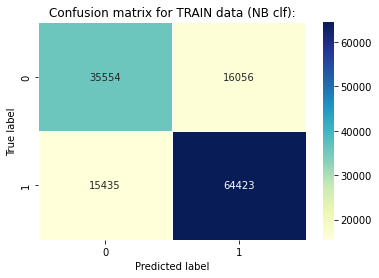

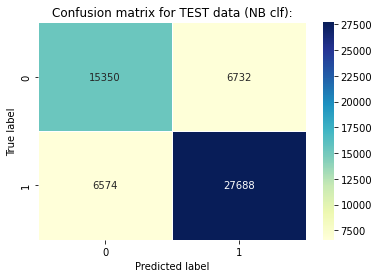

In [37]:
# Evaluate the model with a confusion matrix
## train data
cm = confusion_matrix(y_train, y_pred_train)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data, remove fmt='d' from heatmap code!
plt.figure()
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for TRAIN data (NB clf):');

## test data
cm = confusion_matrix(y_test, y_pred)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data, remove fmt='d' from heatmap code!
plt.figure()
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for TEST data (NB clf):');

## Hyperparameter Tuning

In [38]:
param_lr = {'penalty':('l1','l2'), 
            'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'solver': ['liblinear', 'lbfgs', 'sag', ]
               }

grid_lr = GridSearchCV(lr_clf, param_grid=param_lr, cv=5, scoring='f1', 
                           verbose=5, n_jobs=-1)

grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   1.5s
[CV 3/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   1.5s
[CV 2/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   1.5s
[CV 5/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.5s
[CV 4/5] END ..C=0.0001, penalty=l1, solver=lbfgs;, score=nan total time=   0.7s
[CV 1/5] END ....C=0.0001, penalty=l1, solver=sag;, score=nan total time=   0.6s
[CV 3/5] END ....C=0.0001, penalty=l1, solver=sag;, score=nan total time=   0.4s
[CV 2/5] END ....C=0.0001, penalty=l1, solver=sag;, score=nan total time=   0.5s
[CV 4/5] END ....C=0.0001, penalty=l1, solver=sag;, score=nan total time=   0.4s
[CV 2/5] END C=0.0001, penalty=l1, solver=liblinear;, score=0.735 total time=   3.5s
[CV 3/5] END C=0.0001, penalty=l1, solver=liblinear;, score=0.735 total time=   3.6s
[CV 5/5] END C=0.0001, penalty=l1, solv

/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=0.0001, penalty=l2, solver=sag;, score=0.761 total time= 6.8min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..C=0.0001, penalty=l2, solver=sag;, score=0.757 total time= 6.8min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..C=0.0001, penalty=l2, solver=sag;, score=0.758 total time= 6.8min
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.793 total time=   2.6s
[CV 2/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.794 total time=   1.8s
[CV 3/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.790 total time=   2.1s


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=0.0001, penalty=l2, solver=sag;, score=0.759 total time= 6.8min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..C=0.0001, penalty=l2, solver=sag;, score=0.759 total time= 6.8min
[CV 1/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.3s
[CV 2/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.3s
[CV 4/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.794 total time=   2.5s
[CV 3/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.3s
[CV 4/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.3s
[CV 5/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.3s
[CV 1/5] END ......C=0.01, penalty=l1, solver=sag;, score=nan total time=   0.3s
[CV 5/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.791 total time=   2.7s
[CV 2/5] END ......C=0.01, penalty=l1, solver=sag;, score=nan total time=   0.3s
[CV 3/5] END ......C=0.01, penalty=l1, solver=sag;, score=nan total time=   0.3s
[CV 4/5] END ......C=0.01, penalty=l1, solver=sag;, score=nan total time=   0.3s
[CV 5/5] END ......C=0.0

/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=0.001, penalty=l2, solver=sag;, score=0.782 total time= 6.8min
[CV 3/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.805 total time=  18.0s


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=0.001, penalty=l2, solver=sag;, score=0.779 total time= 6.8min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=0.001, penalty=l2, solver=sag;, score=0.776 total time= 6.8min
[CV 4/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.806 total time=  15.0s
[CV 5/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.806 total time=  15.7s
[CV 1/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.805 total time=   2.5s
[CV 2/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.808 total time=   2.5s
[CV 3/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.802 total time=   2.9s
[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.806 total time=   2.0s
[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.806 total time=   3.3s
[CV 1/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.3s
[CV 2/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.3s
[CV 3/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.3s
[CV 4/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.3s
[CV 5/5] END .....C=0.1

/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=0.001, penalty=l2, solver=sag;, score=0.781 total time=38.2min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=0.001, penalty=l2, solver=sag;, score=0.777 total time=38.3min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.786 total time=38.3min
[CV 1/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.787 total time=38.3min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.781 total time=38.3min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.787 total time=38.3min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.783 total time=38.4min
[CV 1/5] END .C=1, penalty=l1, solver=liblinear;, score=0.805 total time=  11.8s
[CV 2/5] END .C=1, penalty=l1, solver=liblinear;, score=0.809 total time=  11.5s
[CV 3/5] END .C=1, penalty=l1, solver=liblinear;, score=0.801 total time=  12.6s
[CV 1/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.4s
[CV 2/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.4s
[CV 3/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.4s
[CV 4/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.4s
[CV 5/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.4s
[CV 1/5] END .........C=1, penalty=l1, solver=sag;, score=nan total time=   0.4s
[CV 2/5] END .........C=1, penalty=l1, solver=sag;, score=nan total time=   0.4s
[CV 4/5] END .C=1, penalty=l1, solver=liblinear;, score=0.805 total time=   6.0s
[CV 3/5] END .........C=1, p

/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.788 total time=38.9min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.786 total time= 7.9min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.782 total time= 8.0min
[CV 1/5] END C=10, penalty=l1, solver=liblinear;, score=0.804 total time=  13.4s
[CV 2/5] END C=10, penalty=l1, solver=liblinear;, score=0.809 total time=  10.4s
[CV 3/5] END C=10, penalty=l1, solver=liblinear;, score=0.801 total time=  12.3s


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.783 total time= 8.0min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.788 total time= 8.0min
[CV 1/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.5s
[CV 2/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.4s
[CV 3/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.4s
[CV 4/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.5s
[CV 5/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.4s
[CV 1/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.4s
[CV 2/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.3s
[CV 3/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.4s
[CV 4/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.4s
[CV 5/5] END ........C=10, penalty=l1, solver=sag;, score=nan total time=   0.4s
[CV 1/5] END C=10, penalty=l2, solver=liblinear;, score=0.805 total time=   2.2s
[CV 2/5] END C=10, penalty=l

/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.809 total time= 1.5min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .......C=1, penalty=l2, solver=sag;, score=0.788 total time= 8.0min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .......C=1, penalty=l2, solver=sag;, score=0.786 total time= 8.0min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .......C=1, penalty=l2, solver=sag;, score=0.782 total time= 8.0min
[CV 5/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.805 total time=  48.2s
[CV 4/5] END ....C=10, penalty=l2, solver=lbfgs;, score=0.805 total time= 1.2min
[CV 1/5] END C=100, penalty=l1, solver=liblinear;, score=0.804 total time=   6.6s
[CV 2/5] END C=100, penalty=l1, solver=liblinear;, score=0.809 total time=   6.1s
[CV 3/5] END C=100, penalty=l1, solver=liblinear;, score=0.801 total time=   8.6s
[CV 4/5] END C=100, penalty=l1, solver=liblinear;, score=0.804 total time=   2.6s
[CV 5/5] END C=100, penalty=l1, solver=liblinear;, score=0.805 total time=   4.9s
[CV 1/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.4s
[CV 2/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.3s
[CV 3/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.4s
[CV 4/5] END .....C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.3s
[CV 5/5] END .....C=100

/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .......C=1, penalty=l2, solver=sag;, score=0.787 total time= 8.1min
[CV 5/5] END C=100, penalty=l2, solver=liblinear;, score=0.806 total time=   2.2s
[CV 1/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.804 total time=  44.3s


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.808 total time= 1.3min
[CV 3/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.802 total time= 1.2min
[CV 4/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.806 total time= 1.2min
[CV 5/5] END ...C=100, penalty=l2, solver=lbfgs;, score=0.805 total time=  49.4s


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .......C=1, penalty=l2, solver=sag;, score=0.783 total time= 8.3min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=10, penalty=l2, solver=sag;, score=0.788 total time= 8.2min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=10, penalty=l2, solver=sag;, score=0.786 total time= 8.2min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=10, penalty=l2, solver=sag;, score=0.782 total time= 8.2min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=10, penalty=l2, solver=sag;, score=0.787 total time= 8.2min
[CV 2/5] END C=1000, penalty=l1, solver=liblinear;, score=0.808 total time=  14.4s
[CV 1/5] END C=1000, penalty=l1, solver=liblinear;, score=0.804 total time=  16.8s
[CV 3/5] END C=1000, penalty=l1, solver=liblinear;, score=0.801 total time=   3.5s
[CV 4/5] END C=1000, penalty=l1, solver=liblinear;, score=0.804 total time=  10.1s
[CV 1/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.5s
[CV 2/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.6s
[CV 3/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.5s
[CV 4/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.6s


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=10, penalty=l2, solver=sag;, score=0.783 total time= 8.3min
[CV 5/5] END ....C=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.4s
[CV 1/5] END ......C=1000, penalty=l1, solver=sag;, score=nan total time=   0.4s
[CV 2/5] END ......C=1000, penalty=l1, solver=sag;, score=nan total time=   0.4s
[CV 3/5] END ......C=1000, penalty=l1, solver=sag;, score=nan total time=   0.4s
[CV 4/5] END ......C=1000, penalty=l1, solver=sag;, score=nan total time=   0.4s
[CV 5/5] END ......C=1000, penalty=l1, solver=sag;, score=nan total time=   0.4s
[CV 1/5] END C=1000, penalty=l2, solver=liblinear;, score=0.805 total time=   2.5s
[CV 2/5] END C=1000, penalty=l2, solver=liblinear;, score=0.810 total time=   2.7s
[CV 3/5] END C=1000, penalty=l2, solver=liblinear;, score=0.802 total time=   2.2s
[CV 4/5] END C=1000, penalty=l2, solver=liblinear;, score=0.806 total time=   2.3s
[CV 5/5] END C=1000, penalty=l2, solver=liblinear;, score=0.806 total time=   2.3s
[CV 5/5] END C=100

/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..C=1000, penalty=l2, solver=lbfgs;, score=0.806 total time= 1.3min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=100, penalty=l2, solver=sag;, score=0.788 total time= 8.5min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=100, penalty=l2, solver=sag;, score=0.786 total time= 8.5min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=100, penalty=l2, solver=sag;, score=0.782 total time= 8.6min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=100, penalty=l2, solver=sag;, score=0.788 total time= 8.3min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=100, penalty=l2, solver=sag;, score=0.783 total time= 8.2min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=1000, penalty=l2, solver=sag;, score=0.788 total time= 7.2min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=1000, penalty=l2, solver=sag;, score=0.786 total time= 6.8min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=1000, penalty=l2, solver=sag;, score=0.782 total time= 6.6min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=1000, penalty=l2, solver=sag;, score=0.787 total time= 6.2min


/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zoe/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zoe/neuefische/kickstarter-ml/.v

[CV 5/5] END ....C=1000, penalty=l2, solver=sag;, score=0.783 total time= 6.0min


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ('l1', 'l2'),
                         'solver': ['liblinear', 'lbfgs', 'sag']},
             scoring='f1', verbose=5)

In [39]:
## CURRENTLY FOR SCORE='F1'

# Show best parameters
print('Best score:\n{:.2f}'.format(grid_lr.best_score_))
print("Best parameters:\n{}".format(grid_lr.best_params_))

# Save best model as best_model
best_log_reg = grid_lr.best_estimator_
print(best_log_reg)

Best score:
0.81
Best parameters:
{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=0.01, max_iter=1000, solver='liblinear')


Classification report for TEST data: 
               precision    recall  f1-score   support

           0       0.72      0.63      0.67     22082
           1       0.78      0.84      0.81     34262

    accuracy                           0.76     56344
   macro avg       0.75      0.74      0.74     56344
weighted avg       0.76      0.76      0.76     56344

--------------------------------------------------------------------------------


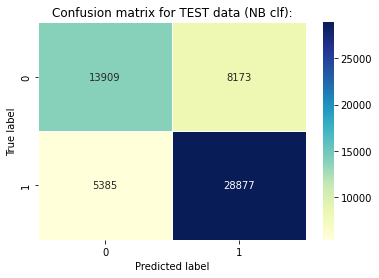

In [40]:
# evaluate test set
y_pred = best_log_reg.predict(X_test)

## classification report
print('Classification report for TEST data: \n {}'.format(classification_report(y_test, y_pred)))
print("--------"*10)

## confusion matrix
cm = confusion_matrix(y_test, y_pred)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data, remove fmt='d' from heatmap code!
plt.figure()
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for TEST data (NB clf):');

## ROC-AUC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.845


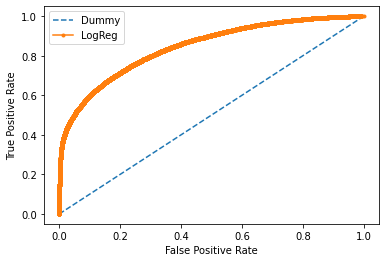

In [41]:
# fit best model to training data
best_log_reg.fit(X_train, y_train)

# predict probabilities
lr_probs = best_log_reg.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# generate a no skill prediction (majority class) (does the same as the dummy classifier)
ns_probs = [1 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LogReg')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Precision-Recall Curve

Logistic Regression: f1=0.810 auc=0.903


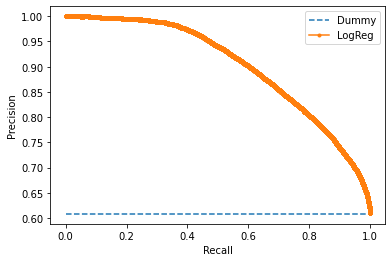

In [43]:
# precision-recall curve and f1

# predict class values
yhat = best_log_reg.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)


# plot the precision-recall curve for the model
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Dummy')
plt.plot(lr_recall, lr_precision, marker='.', label='LogReg')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show();

In [45]:
## save the model!

import pickle

filename = 'logreg_model.sav'
pickle.dump(best_log_reg, open(filename, 'wb'))